In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, Math, Latex

# Exercice 2

On lance deux dés (équilibrés).

Déterminer, grâce à un réseau bayésien, la loi de probabilité du maximum des chiffres indiqués par les 2 dés.

Note 1 : on peut représenter des dépendances fonctionnelles entre variables par des CPTs ne contenant que des probabilités $0$ ou $1$

Note 2 : construire ces CPTs à la main serait fastidieux, même pour deux dés. PyAgrum permet d'utiliser directement des définitions fonctionnelles pour instancier celles-ci (cf cheatsheet).

In [2]:
bn2=gum.fastBN("D1[1,6]->M[1,6]<-D2[1,6]")
bn2

(pyAgrum.BayesNet<double>@00000214B41AA610) BN{nodes: 3, arcs: 2, domainSize: 216, dim: 190, mem: 1Ko 800o}

In [3]:
bn2.cpt("D1").fillWith([1]*6).normalize()
bn2.cpt("D2").fillWith([1]*6).normalize()
bn2.cpt("M").fillWithFunction("max(D1,D2)")

(pyAgrum.Potential<double>@00000214A4AD8130) 
             ||  M                                                        |
D1    |D2    ||1        |2        |3        |4        |5        |6        |
------|------||---------|---------|---------|---------|---------|---------|
1     |1     || 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
2     |1     || 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
3     |1     || 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  |
4     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  |
5     |1     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  |
6     |1     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
[...24 more line(s) ...]
1     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
2     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
3     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
4     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
5     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
6     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |

In [4]:
bn=gum.BayesNet()

d1=bn.add(gum.RangeVariable("D1","Dé 1",1,6))
d2=bn.add(gum.RangeVariable("D2","Dé 2",1,6))

m=bn.addMAX(gum.RangeVariable("M","Max(D1,D2)",1,6))

bn.addArc(d1,m)
bn.addArc(d2,m)

bn.cpt(d1).fillWith([1]*6).normalize()
bn.cpt(d2).fillWith([1]*6).normalize()
bn.cpt("M")

(pyAgrum.Potential<double>@00000214A4AD8110) 
             ||  M                                                        |
D1    |D2    ||1        |2        |3        |4        |5        |6        |
------|------||---------|---------|---------|---------|---------|---------|
1     |1     || 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
2     |1     || 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  |
3     |1     || 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  | 0.0000  |
4     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  | 0.0000  |
5     |1     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  | 0.0000  |
6     |1     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
[...24 more line(s) ...]
1     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
2     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
3     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
4     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
5     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |
6     |6     || 0.0000  | 0.0000  | 0.0000  | 0.0000  | 0.0000  | 1.0000  |

In [5]:
gnb.sideBySide(bn,bn2)

gnb.sideBySide(bn.cpt("M"),bn2.cpt("M"))

G <!-- D2 --> D2 D2 <!-- M --> M M <!-- D2->M --> D2->M <!-- D1 --> D1 D1 <!-- D1->M --> D1->M,G <!-- D2 --> D2 D2 <!-- M --> M M <!-- D2->M --> D2->M <!-- D1 --> D1 D1 <!-- D1->M --> D1->M


Calculer la distribution de la somme : 
a priori,

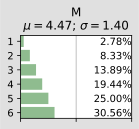

[0.027777777777777776, 0.08333333333333333, 0.1388888888888889, 0.19444444444444442, 0.24999999999999997, 0.3055555555555555]


(pyAgrum.Potential<double>@00000214A359C420) 
  M                                                        |
1        |2        |3        |4        |5        |6        |
---------|---------|---------|---------|---------|---------|
 0.0278  | 0.0833  | 0.1389  | 0.1944  | 0.2500  | 0.3056  |

In [6]:
#histogramme
gnb.showPosterior(bn,target='M',evs={})

# liste
print(gum.getPosterior(bn,target='M',evs={}).tolist())

# potentiel
gum.getPosterior(bn,target='M',evs={})


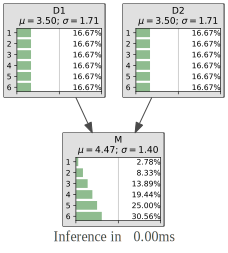

In [7]:
gnb.showInference(bn)

Vérifier la distribution de la loi de probabilité de ce même maximum en supposant que le tirage du dé 1 vaut 3

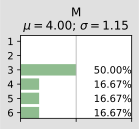

In [8]:
gnb.showPosterior(bn,target='M',evs={"D1":2}) # 3 est d'index 2

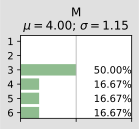

In [9]:
gnb.showPosterior(bn,target='M',evs={"D1":"3"})

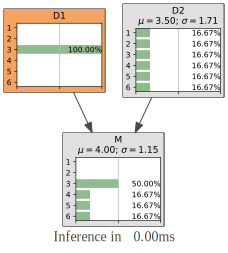

In [10]:
gnb.showInference(bn,evs={"D1":"3"})

puis qu'il est plus grand que 3, 

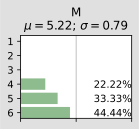

In [11]:
gnb.showPosterior(bn,target='M',evs={"D1":[0,0,0,1,1,1]})

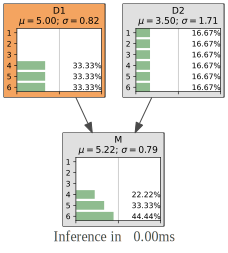

In [12]:
gnb.showInference(bn,evs={"D1":[0,0,0,1,1,1]})

puis en ajoutant que le maximum est pair

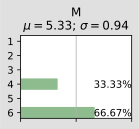

In [13]:
gnb.showPosterior(bn,target='M',evs={"D1":[0,0,0,1,1,1],"M":[0,1,0,1,0,1]})

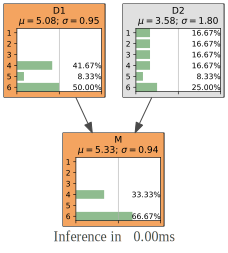

In [14]:
gnb.showInference(bn,evs={"D1":[0,0,0,1,1,1],"M":[0,1,0,1,0,1]})